### Setup Environment:

In [1]:
from src.google_trends import get_interest_over_time
from src.get_data import get_daquar_dataset, preprocess_daquar_dataset
from src.get_data import get_cocoqa_dataset, process_cocoqa_data
from src.get_data import download_fakeddit_files, create_stratified_subset_fakeddit, download_full_set_images, download_images_from_file
from src.get_data import download_recipes5k_dataset, preprocess_recipes5k

### Download Datasets:

The Fusion Model has been evaluated in 3 different datasets:

* **Domestic Violence Dataset**:

This dataset uses satellite images, social media data and domestic violence reports. The code and files used to generate and extract the dataset can be found in `datasets/violence_prediction`.


* **Satellite**: To download the satellite images go to `datasets/violence_prediction/Satellite`. There you'll find the satellite extractor. Take into account that the satellite extractor requires the coordinates of the Region of Interes (ROI). You can use the file `Coordinates/get_coordinates.ipynb` to generate the ROI of your specific location. There is also a `DataAnalysis.ipynb` to assess the quality of the images.
* **Metadata**: The labels are located in the directory `datasets/violence_prediction/Metadata`. The labels were downloaded from open public data sources through the number of police reports of domestic violence reported in Colombia  from January 1, 2010 to August 28, 2023. You can find information about the data sources in the `data_sources.txt`. Use the `get_dataset.ipynb` to preprocess and merge the data sources, and the `Data_Analysis.ipynb` to run a data analysis.
* **Internet**: We've provided some codes to extract social media data.
    * Google Trends: We provided some a to get queries and access to trens in specific regions. Since we are interested in 10 specific regions in Colombia, we'll provide an example for one of those regions, but feel free to change the KEYWORD and ISO CODE.

##### Google Trends:

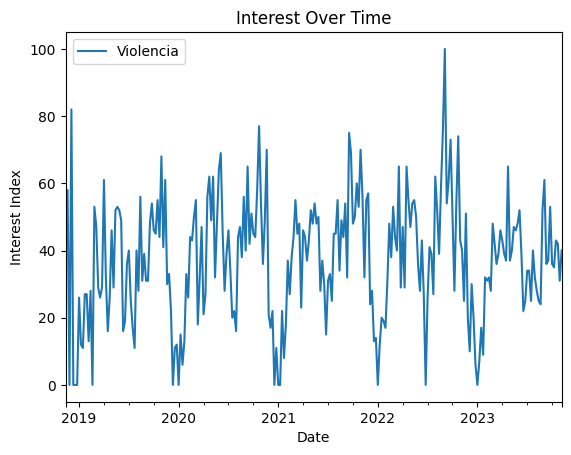

In [12]:
import os

CODE = 'CO-NSA' 
KEYWORD = 'Violencia'

df = get_interest_over_time(CODE, KEYWORD)

os.makedirs('datasets/violence_prediction/Internet/Google/cities/', exist_ok=True)
df.to_csv(f'datasets/violence_prediction/Internet/Google/cities/{CODE}_{KEYWORD}.csv')

* **[DAQUAR Dataset](https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/research/vision-and-language/visual-turing-challenge#c7057)**:

DAQUAR (Dataset for Question Answering on Real-world images) dataset was created for the purpose of advancing research in visual question answering (VQA). It consists of indoor scene images, each accompanied by sets of questions related to the scene's content. The dataset serves as a benchmark for training and evaluating models in understanding images and answering questions about them.

This dataset can be downloaded from the following [link](https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/research/vision-and-language/visual-turing-challenge#c7057). Or you can download the dataset using the function `get_daquar_dataset`.

Once you have the dataset, use the function `preprocess_daquar_dataset` to proprocess the train and test set, and generate the `labes.csv` file.

These functions will generate a dataset with the structure:

* output_dir/
    * labels.csv
    * test.txt
    * train.txt
    * images/
        * image1.png
        * image2.png
        * image3.png
        
        ...
        
        * imagen.png

In [2]:
output_dir = 'datasets/daquar/'
get_daquar_dataset(output_dir)
preprocess_daquar_dataset(output_dir)

Images downloaded and uncompressed successfully.
Labels downloaded successfully.
Preprocessed data saved to datasets/daquar/labels.csv


* **[COCO-QA Dataset](https://www.cs.toronto.edu/~mren/research/imageqa/data/cocoqa/)**:

The COCO-QA (COCO Question-Answering) dataset is designed for the task of visual question-answering. It is a subset of the COCO (Common Objects in Context) dataset, which is a large-scale dataset containing images with object annotations. The COCO-QA dataset extends the COCO dataset by including questions and answers associated with the images. Each image in the COCO-QA dataset is accompanied by a set of questions and corresponding answers.

You can use the `get_cocoqa_dataset` Function to download the dataset.

Example usage of the function:

`get_cocoqa_dataset(output_dir="datasets/coco-qa/")`

Also run the function to preprocess the dataset:

`process_cocoqa_data(output_dir="datasets/coco-qa/")`

After executing these functions, you will have the following structure in the "datasets/coco-qa/" directory:

* datasets/coco-qa/
    * labels.csv
    * train/
    * test/
    * images/
        * image1.png
        * image2.png
        * image3.png
        
        ...
        
        * imagen.png 

#### 

In [3]:
# Example usage
output_dir = 'datasets/coco-qa/'
get_cocoqa_dataset(output_dir)
process_cocoqa_data(output_dir)

COCO-QA dataset downloaded and uncompressed successfully.
COCO images downloaded and uncompressed successfully.
Train and test dataframes saved successfully.
Combined dataframe saved successfully.
Images removed successfully.


* **[Fakeddit Dataset](https://fakeddit.netlify.app/)**:

Fakeddit is a large-scale multimodal dataset for fine-grained fake news detection. It consists of over 1 million samples from multiple categories of fake news, including satire, misinformation, and fabricated news. The dataset includes text, images, metadata, and comment data, making it a rich resource for developing and evaluating fake news detection models.

You can use the se the function `download_fakeddit_files` to download the metadata, and the function `download_full_set_images`to get the full set of Images. 

Since the full set of images contains 1M images, we'll provide a function to generate a subset, to run the experiments with less resources. Use the function `create_stratified_subset_fakeddit`. This function will generate a `labels.csv` file with the subset.

You can also use the `download_images_from_file` to download the images from an specific file


In [2]:
# Example usage
output_dir = 'datasets/fakeddit/'

# Get Metadata:
download_fakeddit_files(output_dir)

# Get Images (Due to possible API changes, we recommend this method):
download_full_set_images(output_dir)

# Random subset:
subset_size = 0.1  # 10% subset size
create_stratified_subset_fakeddit(output_dir, subset_size)

#download_images_from_file(output_dir, 'labels.csv')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1cjY6HsHaSZuLVHywIxD5xQqng33J5S2b
From (redirected): https://drive.google.com/uc?id=1cjY6HsHaSZuLVHywIxD5xQqng33J5S2b&confirm=t&uuid=25f70429-0d7f-4575-a219-133d8d39a23b
To: /home/datascience/Data Fusion/datasets/fakeddit/Images.tar.bz2
100%|██████████| 114G/114G [16:12<00:00, 117MB/s]    


* **[Recipes5k Dataset](http://www.ub.edu/cvub/recipes5k/)**:

The Recipes5k dataset comprises 4,826 recipes featuring images and corresponding ingredient lists, with 3,213 unique ingredients simplified from 1,014 by removing overly-descriptive particles, offering a diverse collection of alternative preparations for each of the 101 food types from Food101, meticulously balanced across training, validation, and test splits. The dataset addresses intra- and inter-class variability, extracted from Yummly with 50 recipes per food type.

You can use the se the function `download_recipes5k_dataset` to download the dataset. Use the function `preprocess_recipes5k` to preprocess the dataset. These function will generate the following structure:

* preprocess_recipes5k
    * labels.csv
    * Images/
        * class_1/
            * img_1
            * img_2
            ...
        * class_2/
            * img_1
            * img_2
            ...
        ...
        * class_n/
            * img_1
            * img_2
            ...

In [3]:
# Example usage
# The function generates the directory 'Recipes5k' by default, so you don't have to specify that.
output_dir = 'datasets/'
download_recipes5k_dataset(output_dir)
preprocess_recipes5k('datasets/Recipes5k/')